### Part 1 - data visualization and velocity distributions


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import scipy.constants as spc
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [29]:
data = np.genfromtxt('obj3.data')

In [30]:
ra_ = data[:,1]
dec_ = data [:,2]
z_ = data[:,3]
ez_ = data[:,4]

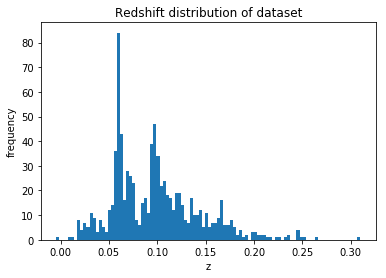

In [41]:
plt.hist(z_, bins=100)
plt.xlabel('z')
plt.ylabel('frequency')
plt.title('Redshift distribution of dataset')
plt.show()

In [32]:
object1 = []
object2 = []

# Edit ranges to adjust z cut-offs

for i in range(len(data[:,0])):
    if 0.05 < data[i,3] < 0.07:
        object1.append(data[i,:])
    elif 0.08 < data[i,3] < 0.11:   
        object2.append(data[i,:])

object1 = np.array(object1)
ra1_ = object1[:,1]
dec1_ = object1[:,2]
z1_ = object1[:,3]

object2 = np.array(object2)
ra2_ = object2[:,1]
dec2_ = object2[:,2]
z2_ = object2[:,3]

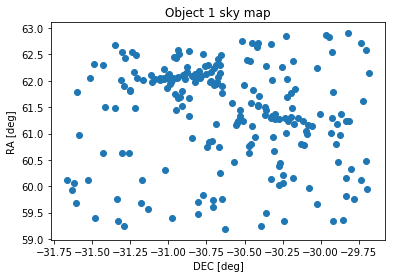

In [33]:
plt.scatter(dec1_,ra1_)
plt.xlabel('DEC [deg]')
plt.ylabel('RA [deg]')
plt.title('Object 1 sky map')
plt.show()

In [40]:
cut_obj1 = []

for i in range(len(object1[:,0])):
    if -31.5 < dec1_[i] < -30.5: 
        if 61.5 < ra1_[i] < 62.5:
            cut_obj1.append(object1[i,:])
            
cut_obj1 = np.array(cut_obj1)

cut_ra1_ = cut_obj1[:,1]
cut_dec1_ = cut_obj1[:,2]
cut_z1_ = cut_obj1[:,3]

Since the range of z is small, we can calculate the velocity using : $$ z = \frac{v}{c}$$

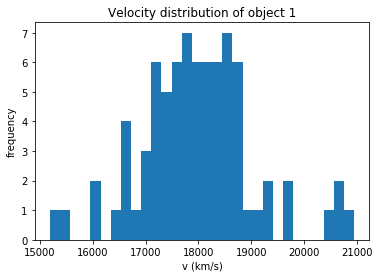

In [35]:
binsize = 30
N1, v1, patches1 =plt.hist(cut_z1_*spc.c/1000,bins=binsize)
plt.xlabel('v (km/s)')
plt.ylabel('frequency')
plt.title('Velocity distribution of object 1')
v1 = v1[0:binsize]

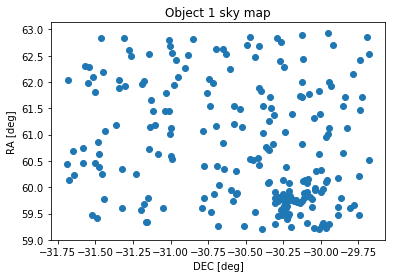

In [37]:
plt.scatter(dec2_,ra2_)
plt.xlabel('DEC [deg]')
plt.ylabel('RA [deg]')
plt.title('Object 1 sky map')
plt.show()

In [38]:
cut_obj2 = []

for i in range(len(object2[:,0])):
    if -30.5 < dec2_[i] < -29.75:
        if 59 < ra2_[i] < 60.5:
            cut_obj2.append(object2[i,:])
            
cut_obj2 = np.array(cut_obj2)

cut_ra2_ = cut_obj2[:,1]
cut_dec2_ = cut_obj2[:,2]
cut_z2_ = cut_obj2[:,3]

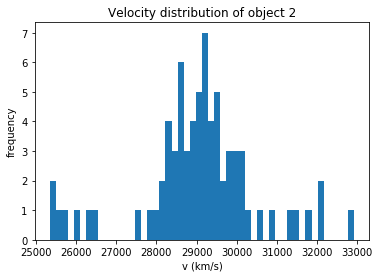

In [39]:
binsize2 = 50
N2,v2, patches2 = plt.hist(cut_z2_*spc.c/1000, bins=binsize2)
plt.xlabel('v (km/s)')
plt.ylabel('frequency')
plt.title('Velocity distribution of object 2')
v2 = v2[0:binsize2]

### Part 2 - Velocity dispersion


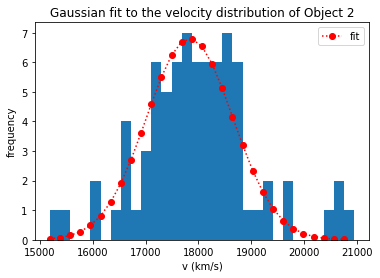

[6.80738109e+00 1.78333578e+04 8.16050596e+02]


In [27]:
x1 = v1
y1 = N1

n = len(x1)                          
mean = 18000
sigma = 1000

def gaus(x1,a,x0,sigma):
    return a*exp(-(x1-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x1,y1,p0=[1,mean,sigma])

plt.hist(cut_z1_*spc.c/1000,bins=binsize)
plt.plot(x1,gaus(x1,*popt),'ro:',label='fit')
plt.legend()
plt.title('Gaussian fit to the velocity distribution of Object 2')
plt.xlabel('v (km/s)')
plt.ylabel('frequency')
plt.errorbar(cut_z1_*spc.c/1000*)
plt.show()

print(popt)

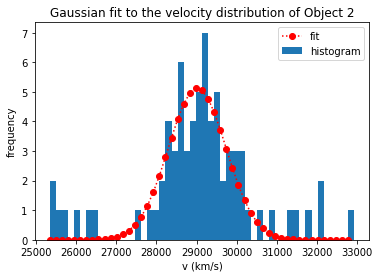

[ 5.12460385e+00  2.90163778e+04 -7.18557321e+02]


In [26]:
x2 = v2
y2 = N2

n = len(x2)                          
mean = 29000
sigma = 1000

def gaus(x2,a,x0,sigma):
    return a*exp(-(x2-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x2,y2,p0=[1,mean,sigma])

plt.hist(cut_z2_*spc.c/1000,bins=binsize2,label='histogram')
plt.plot(x2,gaus(x2,*popt),'ro:',label='fit')
plt.legend()
plt.title('Gaussian fit to the velocity distribution of Object 2')
plt.xlabel('v (km/s)')
plt.ylabel('frequency')
plt.show()

print(popt)

### Part 3 - Size and mass estimation
$$a = \theta d (1+z)^{2}$$ 

Where:

d  is the distance to the object, calculated using Ned Wright's cosmology calculator with: $H = 69.6$, $ \quad \Omega_{M} = 0.286$, $\quad \Omega_{vac}= 0.7$

$\theta$  is the angle estimated to be $0.5 \textrm{deg} = 0.008 \textrm{rad}$ for both objects.

z is the redshift taken as the mean of the gaussian distribution above, 0.06 for object 1 and 0.1 for object 2.


With these values, we obtain: $$a = 2.16 \textrm{ Mpc } \quad \textrm{for object 1}$$ $$a = 3.70 \textrm{ Mpc } \quad \textrm{for object 2}$$



To calculate the mass at half light radius:

$$M_{1/2} \sim 930 \left( \frac{\langle\sigma^2\rangle}{\text{km}^2\text{s}^{-2}} \right)\left(\frac{R_e}{\text{pc}}\right) M_{\odot}$$

Where $\sigma = 816.05$ km/s for object 1 and $\sigma = 718.55$ km/s for object 2
and $R_{e}$ = a as calculated above.

We obtain: $$M_{1/2} = 6.7 \times 10^{14} M_{\odot} \quad \textrm{for object 1}$$ $$M_{1/2} = 8.9 \times 10^{14}M_{\odot} \quad \textrm{for object 2}$$

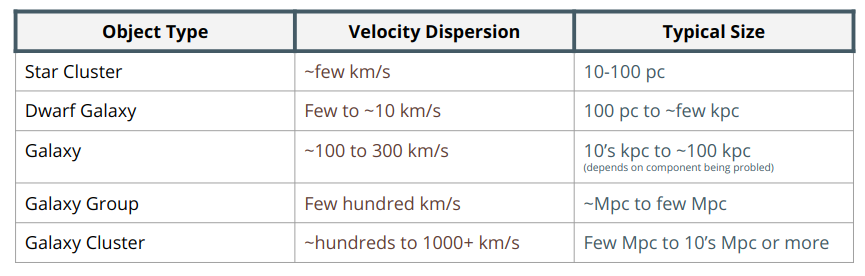

In [25]:
from IPython.display import Image
Image(filename='table.png') 